In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
%matplotlib inline

In [26]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [27]:
summary = pd.read_csv('data/atussum_2014.dat')

In [9]:
corr = summary.corr()

In [10]:
summary.rename(columns={'TEAGE':'Age', 'TESEX':'Sex', 'TRCHILDNUM': 'Num_Kids', 'tucaseid':'ID', 't030102':'read_kids', 't030106':'talk_kids', 't030104':'arts_kids', 't120303':'TV'}, inplace=True)

In [22]:
summary.TV.describe()

count    11592.000000
mean       179.350587
std        181.520430
min          0.000000
25%         45.000000
50%        121.000000
75%        260.000000
max       1385.000000
Name: TV, dtype: float64

In [11]:
w_data = summary[summary.Sex == 2]
w_data = w_data[w_data.Age > 20]
m_data = summary[summary.Sex == 1]
m_data = m_data[m_data.Age > 20]

In [13]:
w_data.head(20)

,ID,TUFINLWGT,TRYHHCHILD,Age,Sex,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,Num_Kids,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010501,t019999,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,t020301,t020302,t020303,t020399,t020401,t020402,t020499,t020501,t020502,...,t180599,t180601,t180602,t180603,t180604,t180699,t180701,t180702,t180703,t180704,t180799,t180801,t180802,t180803,t180804,t180805,t180806,t180807,t180899,t180901,t180902,t180903,t180905,t180999,t181001,t181002,t181099,t181101,t181201,t181202,t181203,t181204,t181205,t181299,t181301,t181302,t181399,t181401,t181501,t181599,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
2,20140101140028,2.094182e+07,2,65,2,38,1,1,1,5,-1,-1,-1,-1,3,-1,-1,3,-1,-1,2,0,-1,0,555,0,90,0,0,0,0,0,0,0,60,0,0,0,240,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20140101140063,2.505899e+06,-1,50,2,39,2,2,2,5,-1,-1,-1,-1,3,-1,-1,0,-1,-1,1,0,-1,0,780,0,60,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0
4,20140101140168,1.592823e+07,8,23,2,39,2,2,2,4,-1,-1,2,-1,3,-1,-1,1,-1,-1,4,0,-1,200,645,0,60,0,0,0,0,0,0,95,0,0,0,0,140,0,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,20140101140614,2.019096e+06,-1,63,2,40,1,2,1,1,2,2,-1,-1,3,-1,14490,0,-1,-4,1,0,-1,0,425,0,70,0,0,0,0,0,0,0,0,0,0,0,154,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70,0
10,20140101140665,4.778596e+06,-1,66,2,39,1,2,1,1,2,1,-1,-1,1,2,73076,0,-1,40,1,0,-1,0,495,0,15,0,0,0,0,0,0,0,35,0,10,0,30,0,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,20140101140702,6.323639e+06,0,31,2,39,1,1,1,5,-1,-1,2,-1,3,-1,-1,3,-1,-1,6,0,-1,625,690,0,0,0,0,0,0,0,0,180,120,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,20140101140804,6.209018e+06,10,41,2,42,1,2,1,1,2,1,2,-1,1,1,67206,2,1,40,5,0,-1,123,459,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,20140101140836,2.068192e+06,-1,85,2,34,1,2,1,5,-1,-1,-1,-1,3,-1,-1,0,-1,-1,1,0,-1,0,535,0,105,0,0,0,0,0,0,0,0,0,0,0,120,0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,20140101140854,4.731635e+06,-1,21,2,40,1,1,1,5,-1,-1,1,2,3,-1,-1,0,-1,-1,1,0,-1,0,720,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,20140101140872,8.369759e+06,9,45,2,40,1,2,1,1,2,1,2,-1,1,1,109615,3,1,40,4,0,-1,662,478,0,0,0,0,0,0,0,0,30,2,0,0,0,30,0,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
m_data.head(20)

,ID,TUFINLWGT,TRYHHCHILD,Age,Sex,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,Num_Kids,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010501,t019999,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,t020301,t020302,t020303,t020399,t020401,t020402,t020499,t020501,t020502,...,t180599,t180601,t180602,t180603,t180604,t180699,t180701,t180702,t180703,t180704,t180799,t180801,t180802,t180803,t180804,t180805,t180806,t180807,t180899,t180901,t180902,t180903,t180905,t180999,t181001,t181002,t181099,t181101,t181201,t181202,t181203,t181204,t181205,t181299,t181301,t181302,t181399,t181401,t181501,t181599,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
5,20140101140537,3.622351e+06,-1,85,1,36,2,2,1,5,-1,-1,-1,-1,3,-1,-1,0,-1,-1,1,0,-1,0,240,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,20140101140559,3.653338e+06,1,27,1,43,1,2,2,1,1,1,2,-1,1,1,80000,1,2,72,1,0,-1,0,585,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,20140101140610,1.158960e+07,0,28,1,42,1,2,1,1,2,1,2,-1,1,1,100000,1,1,40,1,0,-1,210,450,0,60,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,20140101140639,5.332005e+06,-1,85,1,44,1,2,1,5,-1,-1,-1,-1,3,-1,-1,0,-1,-1,5,0,-1,0,520,0,95,0,0,0,0,0,0,15,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,20140101140685,7.015085e+06,-1,54,1,39,1,2,1,5,-1,-1,-1,-1,3,-1,-1,0,-1,-1,1,0,-1,0,670,0,0,0,5,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,20140101140725,7.339555e+06,1,35,1,44,1,2,1,1,2,1,2,-1,1,1,288461,1,1,45,2,0,-1,126,531,20,65,0,0,0,0,0,0,0,0,0,0,0,15,1,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0,0,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,20140101140759,1.956417e+07,-1,80,1,34,1,2,1,5,-1,-1,-1,-1,1,2,-1,0,-1,-1,5,0,-1,0,510,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,20140101140792,1.711067e+07,-1,37,1,40,8,2,1,3,-1,-1,2,-1,3,-1,-1,0,-1,-1,4,0,-1,0,380,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,0,0,0,0
18,20140101140852,2.182117e+06,-1,67,1,43,1,2,1,5,-1,-1,-1,-1,3,-1,-1,0,-1,-1,1,0,-1,0,440,0,55,0,0,0,0,0,0,0,0,0,25,0,75,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,20140101140875,1.146317e+07,-1,62,1,43,1,2,1,1,2,1,-1,-1,1,1,-1,0,1,50,4,0,-1,0,405,0,20,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
corr.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010501,t019999,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,t020301,t020302,t020303,t020399,t020401,t020402,t020499,t020501,t020502,...,t180599,t180601,t180602,t180603,t180604,t180699,t180701,t180702,t180703,t180704,t180799,t180801,t180802,t180803,t180804,t180805,t180806,t180807,t180899,t180901,t180902,t180903,t180905,t180999,t181001,t181002,t181099,t181101,t181201,t181202,t181203,t181204,t181205,t181299,t181301,t181302,t181399,t181401,t181501,t181599,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
tucaseid,1.000000,0.032235,0.006124,-0.007162,-0.017115,-0.014749,0.000874,-0.006381,0.014979,-0.010093,0.013626,0.008757,-0.002205,0.005914,0.003860,-0.003406,0.009017,-0.007596,0.003683,0.009872,-0.013350,-0.019784,-0.017011,0.000308,0.010324,-0.005818,-0.001168,0.004776,-0.004379,-0.011884,-0.007412,0.012208,-0.014445,-0.009586,-0.007828,0.017338,-0.012747,0.013189,0.008543,0.010741,-0.005629,0.016159,0.002240,0.005701,0.011241,-0.017819,0.012796,-0.011801,-0.001600,0.022209,...,-0.003976,0.000649,-0.016070,-0.001766,-0.003198,-0.014066,-0.017985,0.012833,0.011303,0.026148,0.002996,-0.013946,0.003392,0.016664,-0.009331,-0.004372,-0.001756,0.006042,0.011398,0.014615,0.010227,0.009573,0.008228,0.020336,0.007398,0.014435,-0.012068,0.010027,0.015307,0.020315,0.026962,0.030319,0.003200,-0.000507,0.005196,-0.007342,0.015849,0.006039,0.001851,0.005087,-0.005859,-0.006674,-0.005857,-0.009457,-0.004173,-0.040702,-0.016699,0.002191,-0.017501,-0.009540
TUFINLWGT,0.032235,1.000000,-0.020603,-0.213174,-0.093590,-0.135534,-0.004744,-0.025933,-0.011965,-0.027283,0.020161,0.027835,0.101334,0.139970,-0.099014,0.114233,-0.038998,-0.039614,0.055984,0.000877,0.023955,0.030370,0.001657,-0.156875,-0.041415,-0.025419,0.012275,-0.001598,-0.024432,0.003115,0.000109,-0.005446,-0.001772,-0.069717,-0.054020,-0.013183,-0.006005,-0.009856,-0.056768,0.007277,-0.028583,-0.017861,-0.003603,-0.000480,-0.002007,-0.006040,-0.007231,0.000389,-0.026329,0.007864,...,-0.004507,0.100852,0.009645,0.065614,0.003810,-0.004995,-0.038447,-0.010045,-0.008067,-0.042107,-0.010244,-0.001992,0.006072,0.009523,0.035542,0.002426,-0.004951,0.030364,-0.013586,-0.008969,-0.001839,0.010761,-0.000813,0.002188,0.000510,-0.000807,-0.005270,-0.037174,-0.033707,-0.034725,0.005108,-0.027330,-0.013964,-0.003001,0.022834,-0.009213,-0.005889,-0.062841,-0.012197,-0.015102,-0.004466,0.001674,-0.008920,-0.008441,-0.008630,0.005873,0.001493,0.010360,-0.017711,-0.006392
TRYHHCHILD,0.006124,-0.020603,1.000000,-0.365897,0.004457,-0.080447,0.023713,-0.032566,-0.003213,-0.127396,0.118243,0.120539,0.332842,0.193706,-0.127103,0.073425,0.088859,0.530158,0.181225,0.099644,-0.011469,0.007484,-0.035747,0.240714,0.020389,-0.022609,0.015837,0.006457,-0.025004,-0.012724,-0.003588,-0.006151,-0.006151,0.010549,0.000852,-0.027396,-0.014910,0.015595,-0.004404,0.012746,0.020145,-0.001139,-0.011486,0.007659,-0.003687,-0.012446,0.008351,-0.001971,-0.023519,0.001152,...,-0.006151,0.068926,0.031737,0.024611,0.032643,-0.001737,-0.015091,-0.008927,0.024223,-0.006364,0.006830,-0.002885,-0.015344,-0.008812,-0.027899,-0.016032,0.005643,0.003357,0.008867,-0.001248,0.001864,-0.015919,0.016567,-0.012303,-0.008373,0.001099,-0.006151,0.006380,-0.003018,0.002231,0.003525,0.000568,0.005167,0.022753,0.033397,0.033556,0.023808,-0.011410,0.006999,0.009162,-0.003802,-0.002671,-0.001719,0.003602,0.020722,0.015719,0.013646,0.000088,-0.035564,0.020727
TEAGE,-0.007162,-0.213174,-0.365897,1.000000,0.051919,0.023732,-0.077561,0.128753,0.040644,0.358194,-0.329172,-0.322381,-0.793027,-0.398857,0.000865,0.048818,-0.185747,-0.465020,-0.176407,-0.287181,-0.013825,0.001722,0.071176,-0.314010,-0.041956,0.046288,-0.030377,-0.018538,0.070323

In [43]:
w_tv = round(len(w_data['TV'].unique())/len(w_data['TV'])*100)
print("{}% of women over 20 reported spending time watching TV".format(w_tv))

8% of women over 20 reported spending time watching TV


In [44]:
w_tv = w_data[w_data['TV'] != 0]

In [45]:
w_tv_mean = w_tv['TV'].mean()

In [46]:
w_tv_mean

208.53902738046588

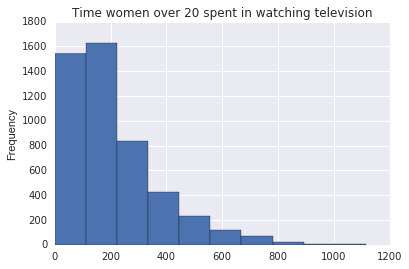

In [55]:
w_tv['TV'].plot(kind='hist', title='Time women over 20 spent in watching television')

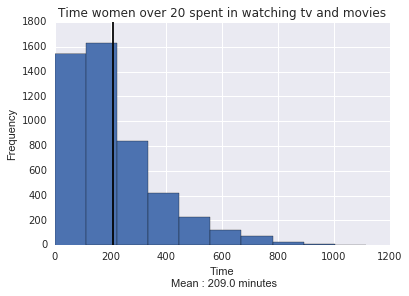

In [66]:
w_tv['TV'].plot(kind='hist', title='Time women over 20 spent in watching tv and movies')
plt.xlabel("Time\n Mean : {} minutes".format(round(w_tv_mean)))
ymin, ymax = plt.ylim()
plt.vlines(w_tv_mean, 0, ymax, color='black')
plt.show()

In [62]:
m_tv = round(len(m_data['TV'].unique())/len(m_data['TV'])*100)
print("{}% of men under 25 reported spending time taking classes".format(m_tv))

11% of men under 25 reported spending time taking classes


In [64]:
m_tv = m_data[m_data['TV'] > 0]
m_tv_mean = m_tv['TV'].mean()

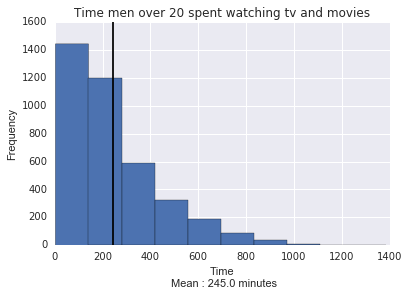

In [67]:
m_tv['TV'].plot(kind='hist', title='Time men over 20 spent watching tv and movies')
plt.xlabel("Time\n Mean : {} minutes".format(round(m_tv_mean)))
ymin, ymax = plt.ylim()
plt.vlines(m_tv_mean, 0, ymax, color='black')
plt.show()